## Stock Data Forecasting Using Deep Learning with Backtesting Strategies

### Group 7
#### Vamshi Kumar Konduru, 11516045
#### Harshitha Rangineni, 11504745
#### Anusha Vanga, 11501693
#### Mallikarjun Pandilla, 11519831

### Installing the below packages

In [ ]:
#For Python 3.xx version
!pip install pandas==1.3.4
!pip install pandas-datareader==0.10.0
!pip install numpy==1.19.4
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2
!pip install scikit-learn==0.24.2
!pip install keras==2.3.1
!pip install yfinance
!pip install tensorflow

### Importing the below module

In [117]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
import datetime
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

## Model for Apple

In [23]:
# model building and training
# here we are Getting the stock quote
start= datetime(2011, 1, 1) #"2011–01–01"
end= datetime(2021, 12, 30) #"2021–12–30"
df_AAPL = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)
# printing the data
df_AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033263
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085626
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168128
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159911
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.232664
...,...,...,...,...,...,...
2021-12-23,176.850006,175.270004,175.850006,176.279999,68356600.0,175.262817
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289459
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255432


In [24]:
"""
# here we are Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
"""

"\n# here we are Visualising the closing price history\nplt.figure(figsize=(16,8))\nplt.title('Close Price History')\nplt.plot(df_AAPL['Close'])\nplt.xlabel('Date', fontsize=18)\nplt.ylabel('Close Price USD ($)', fontsize=18)\nplt.show()\n"

In [25]:
#Creating a new dataframe with only the 'Close' column
data_AAPL = df_AAPL.filter(['Close'])
#Converting the dataframe to a numpy array
dataset_AAPL = data_AAPL.values
#Get /Compute the number of rows to train the model on
training_data_len_AAPL = math.ceil( len(dataset_AAPL) *.8)
training_data_len_AAPL

2215

In [26]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data_AAPL = scaler.fit_transform(dataset_AAPL)
scaled_data_AAPL

array([[0.00301019],
       [0.00337353],
       [0.00394598],
       ...,
       [0.9938486 ],
       [0.994381  ],
       [0.98740153]])

In [27]:
#Creating the scaled training data set
train_data_AAPL = scaled_data_AAPL[0:training_data_len_AAPL  , : ]
#Spliting the data into x_train and y_train data sets
x_train_AAPL=[]
y_train_AAPL =[]
for i in range(60,len(train_data_AAPL)):
    x_train_AAPL.append(train_data_AAPL[i-60:i,0])
    y_train_AAPL.append(train_data_AAPL[i,0])

In [28]:
#Here we are Converting x_train and y_train to numpy arrays
x_train_AAPL, y_train_AAPL = np.array(x_train_AAPL), np.array(y_train_AAPL)

In [29]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train_AAPL = np.reshape(x_train_AAPL, (x_train_AAPL.shape[0],x_train_AAPL.shape[1],1))
x_train_AAPL.shape

(2155, 60, 1)

In [118]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [119]:
#initialisizng the model 
def generate_model(x_train):
    
    model= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    model.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(x_train_AAPL.shape[1],1)))
    model.add(Dropout(0.2))

    # Where:
    #     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

    # Second layer with 0.2% dropout
    model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    model.add(Dropout(0.2))

    #Third layer with 0.2% dropout
    model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    model.add(Dropout(0.2))

    #Fourth layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want the previous output
    model.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.2))
    #Output layer , we are not passing activation function
    model.add(Dense(units=1))
    
    return model

In [37]:
model = generate_model(x_train_AAPL)
#Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')
#fitting the network
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [40]:
import os

path_logs = 'logs'
if path_logs not in os.listdir(os.getcwd()):
    os.mkdir(path_logs)
csv_logger = keras.callbacks.CSVLogger(f'{path_logs}/keras_log_AAPL.csv' ,append=True)
model.fit(x_train_AAPL,y_train_AAPL,batch_size=30,epochs=50, callbacks = [csv_logger])
model.save("Trained_Model/AAPL_predict_model.h5")

Epoch 1/50
72/72 [==============================] - 23s 102ms/step - loss: 0.0031
Epoch 2/50
72/72 [==============================] - 8s 116ms/step - loss: 3.0174e-04
Epoch 3/50
72/72 [==============================] - 8s 116ms/step - loss: 2.2189e-04
Epoch 4/50
72/72 [==============================] - 9s 128ms/step - loss: 2.2204e-04
Epoch 5/50
72/72 [==============================] - 7s 96ms/step - loss: 2.1908e-04
Epoch 6/50
72/72 [==============================] - 8s 111ms/step - loss: 2.0480e-04
Epoch 7/50
72/72 [==============================] - 7s 103ms/step - loss: 2.6766e-04
Epoch 8/50
72/72 [==============================] - 7s 96ms/step - loss: 1.7760e-04
Epoch 9/50
72/72 [==============================] - 7s 101ms/step - loss: 1.7018e-04
Epoch 10/50
72/72 [==============================] - 8s 107ms/step - loss: 1.6808e-04
Epoch 11/50
72/72 [==============================] - 9s 123ms/step - loss: 1.5090e-04
Epoch 12/50
72/72 [==============================] - 10s 138ms/step 

In [41]:
# here we are testing data set
test_data_AAPL = scaled_data_AAPL[training_data_len_AAPL - 60: , : ]
#Creating the x_test and y_test data sets
x_test_AAPL = []
y_test_AAPL =  dataset_AAPL[training_data_len_AAPL : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data_AAPL)):
    x_test_AAPL.append(test_data_AAPL[i-60:i,0])

In [42]:
# here we are converting x_test to a numpy array  
x_test_AAPL = np.array(x_test_AAPL)

In [43]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test_AAPL = np.reshape(x_test_AAPL, (x_test_AAPL.shape[0],x_test_AAPL.shape[1],1))

In [44]:
# now we are getting the models predicted price values
predictions_AAPL = model.predict(x_test_AAPL) 
predictions_AAPL = scaler.inverse_transform(predictions_AAPL)#Undo scaling

In [45]:
# here we are calculaing the value of RMSE 
rmse_AAPL=np.sqrt(np.mean(((predictions_AAPL- y_test_AAPL)**2)))
# printing rmse value for predictions and test set
rmse_AAPL

5.037326163292079

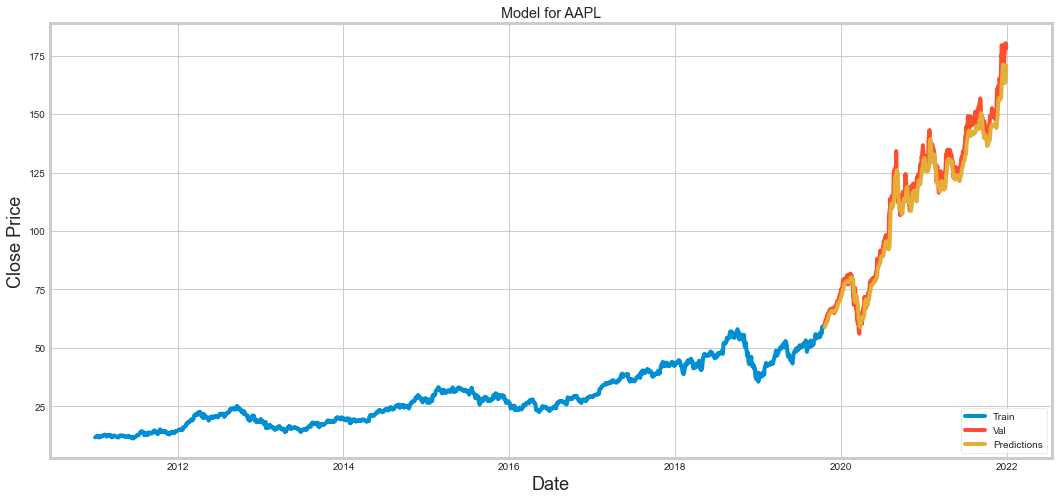

In [46]:
#Plot/Create the data for the graph
train_AAPL = data_AAPL[:training_data_len_AAPL]
valid_AAPL = data_AAPL[training_data_len_AAPL:]
valid_AAPL['Predictions'] = predictions_AAPL
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model for AAPL')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_AAPL['Close'])
plt.plot(valid_AAPL[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
print(valid_AAPL)

                 Close  Predictions
Date                               
2019-10-22   59.990002    58.923485
2019-10-23   60.794998    59.105892
2019-10-24   60.895000    59.363895
2019-10-25   61.645000    59.689224
2019-10-28   62.262501    60.085403
...                ...          ...
2021-12-23  176.279999   163.272339
2021-12-27  180.330002   163.775665
2021-12-28  179.289993   165.687775
2021-12-29  179.380005   168.275452
2021-12-30  178.199997   170.720917

[553 rows x 2 columns]


## Model for Google

In [120]:
df_GOOG = web.DataReader('GOOG', data_source='yahoo', start=start, end=end)
# printing the data
df_GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,15.083214,14.856315,14.856315,15.052330,94962614.0,15.052330
2011-01-04,15.097909,14.946975,15.083962,14.996788,73253547.0,14.996788
2011-01-05,15.201272,14.945232,14.945730,15.169890,101671667.0,15.169890
2011-01-06,15.403016,15.194298,15.209989,15.280226,82620526.0,15.280226
2011-01-07,15.398533,15.196291,15.340251,15.353451,84363033.0,15.353451
...,...,...,...,...,...,...
2021-12-23,148.572601,146.950851,147.089493,147.142502,13818000.0,147.142502
2021-12-27,148.426498,147.250000,147.463501,148.063995,13256000.0,148.063995
2021-12-28,148.374496,145.935501,148.374496,146.447998,18624000.0,146.447998


In [121]:
#Creating a new dataframe with only the 'Close' column
data_GOOG = df_GOOG.filter(['Close'])
#Converting the dataframe to a numpy array
dataset_GOOG = data_GOOG.values
#Get /Compute the number of rows to train the model on
training_data_len_GOOG = math.ceil( len(dataset_GOOG) *.8)
training_data_len_GOOG

2215

In [122]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data_GOOG = scaler.fit_transform(dataset_GOOG)
scaled_data_GOOG

array([[0.02321884],
       [0.02281891],
       [0.02406532],
       ...,
       [0.96931912],
       [0.96972597],
       [0.96611138]])

In [123]:
#Creating the scaled training data set
train_data_GOOG = scaled_data_GOOG[0:training_data_len_GOOG  , : ]
#Spliting the data into x_train and y_train data sets
x_train_GOOG=[]
y_train_GOOG =[]
for i in range(60,len(train_data_GOOG)):
    x_train_GOOG.append(train_data_GOOG[i-60:i,0])
    y_train_GOOG.append(train_data_GOOG[i,0])

In [124]:
#Here we are Converting x_train and y_train to numpy arrays
x_train_GOOG, y_train_GOOG = np.array(x_train_GOOG), np.array(y_train_GOOG)

In [125]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train_GOOG = np.reshape(x_train_GOOG, (x_train_GOOG.shape[0],x_train_GOOG.shape[1],1))

In [135]:
(x_train_GOOG.shape[1],1)

(60, 1)

In [126]:
model = generate_model(x_train_GOOG)

model.compile(optimizer='adam',loss='mean_squared_error')
#fitting the network
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_32 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_33 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_34 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)               

In [127]:
csv_logger_GOOG = keras.callbacks.CSVLogger(f'{path_logs}/keras_log_GOOG_1.csv' ,append=True)
model.fit(x_train_GOOG,y_train_GOOG,batch_size=30,epochs=50, callbacks = [csv_logger_GOOG])
model.save("Trained_Model/GOOG_predict_model.h5")

Epoch 1/50
72/72 [==============================] - 16s 92ms/step - loss: 0.0100
Epoch 2/50
72/72 [==============================] - 7s 96ms/step - loss: 4.8369e-04
Epoch 3/50
72/72 [==============================] - 7s 94ms/step - loss: 4.7125e-04
Epoch 4/50
72/72 [==============================] - 8s 106ms/step - loss: 4.2409e-04
Epoch 5/50
72/72 [==============================] - 8s 105ms/step - loss: 3.8442e-04
Epoch 6/50
72/72 [==============================] - 7s 98ms/step - loss: 3.5700e-04
Epoch 7/50
72/72 [==============================] - 7s 94ms/step - loss: 4.4124e-04
Epoch 8/50
72/72 [==============================] - 8s 110ms/step - loss: 3.8440e-04 0s - loss: 3.8488e-
Epoch 9/50
72/72 [==============================] - 8s 114ms/step - loss: 3.7136e-04
Epoch 10/50
72/72 [==============================] - 9s 126ms/step - loss: 3.2540e-04
Epoch 11/50
72/72 [==============================] - 11s 149ms/step - loss: 3.0891e-04
Epoch 12/50
72/72 [==============================]

In [128]:
# here we are testing data set
test_data_GOOG = scaled_data_GOOG[training_data_len_GOOG - 60: , : ]
#Creating the x_test and y_test data sets
x_test_GOOG = []
y_test_GOOG =  dataset_GOOG[training_data_len_GOOG : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data_GOOG)):
    x_test_GOOG.append(test_data_GOOG[i-60:i,0])

In [129]:
# here we are converting x_test to a numpy array  
x_test_GOOG = np.array(x_test_GOOG)

In [130]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test_GOOG = np.reshape(x_test_GOOG, (x_test_GOOG.shape[0],x_test_GOOG.shape[1],1))

In [131]:
# now we are getting the models predicted price values
predictions_GOOG = model.predict(x_test_GOOG) 
predictions_GOOG = scaler.inverse_transform(predictions_GOOG)#Undo scaling

In [132]:
# here we are calculaing the value of RMSE 
rmse_GOOG=np.sqrt(np.mean(((predictions_GOOG- y_test_GOOG)**2)))
# printing rmse value for predictions and test set
rmse_GOOG

5.2694865836381215

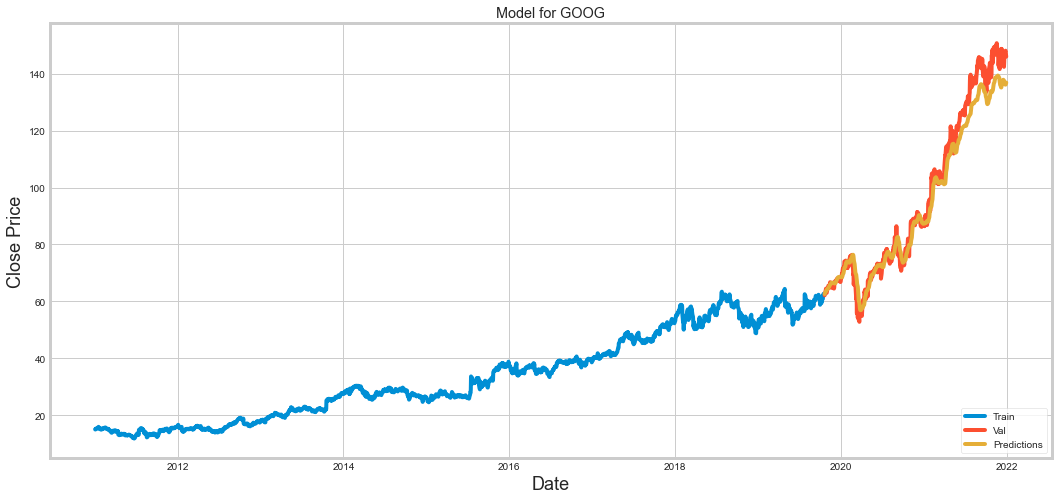

In [136]:
#Plot/Create the data for the graph
train_GOOG = data_GOOG[:training_data_len_GOOG]
valid_GOOG = data_GOOG[training_data_len_GOOG:]
valid_GOOG['Predictions'] = predictions_GOOG
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model for GOOG')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_GOOG['Close'])
plt.plot(valid_GOOG[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [68]:
print(valid_GOOG)

                 Close  Predictions
Date                               
2019-10-22   62.139999    62.975777
2019-10-23   62.956501    63.126080
2019-10-24   63.049500    63.233562
2019-10-25   63.256500    63.346199
2019-10-28   64.500000    63.488770
...                ...          ...
2021-12-23  147.142502   136.467514
2021-12-27  148.063995   137.029236
2021-12-28  146.447998   137.886856
2021-12-29  146.504501   138.607193
2021-12-30  146.002502   138.997238

[553 rows x 2 columns]


## Model for Cisco

In [70]:
df_CSCO = web.DataReader('CSCO', data_source='yahoo', start=start, end=end)
# printing the data
df_CSCO

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,20.620001,20.379999,20.450001,20.490000,54310200.0,14.550558
2011-01-04,20.600000,20.400000,20.510000,20.520000,46273800.0,14.571863
2011-01-05,20.850000,20.530001,20.580000,20.770000,69380400.0,14.749400
2011-01-06,20.959999,20.760000,20.910000,20.950001,65845400.0,14.877220
2011-01-07,21.000000,20.830000,20.860001,20.969999,67732200.0,14.891419
...,...,...,...,...,...,...
2021-12-23,62.900002,61.790001,61.790001,62.279999,17771400.0,60.384605
2021-12-27,63.470001,62.279999,62.410000,63.419998,14779700.0,61.489914
2021-12-28,63.840000,63.230000,63.419998,63.529999,12865000.0,61.596569


In [71]:
#Creating a new dataframe with only the 'Close' column
data_CSCO = df_CSCO.filter(['Close'])
#Converting the dataframe to a numpy array
dataset_CSCO = data_CSCO.values
#Get /Compute the number of rows to train the model on
training_data_len_CSCO = math.ceil( len(dataset_CSCO) *.8)
training_data_len_CSCO

2215

In [72]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data_CSCO = scaler.fit_transform(dataset_CSCO)
scaled_data_CSCO

array([[0.13458093],
       [0.1351782 ],
       [0.14015531],
       ...,
       [0.99143937],
       [1.        ],
       [0.99323113]])

In [73]:
#Creating the scaled training data set
train_data_CSCO = scaled_data_CSCO[0:training_data_len_CSCO  , : ]
#Spliting the data into x_train and y_train data sets
x_train_CSCO=[]
y_train_CSCO =[]
for i in range(60,len(train_data_CSCO)):
    x_train_CSCO.append(train_data_CSCO[i-60:i,0])
    y_train_CSCO.append(train_data_CSCO[i,0])

In [74]:
#Here we are Converting x_train and y_train to numpy arrays
x_train_CSCO, y_train_CSCO = np.array(x_train_CSCO), np.array(y_train_CSCO)

In [75]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train_CSCO = np.reshape(x_train_CSCO, (x_train_CSCO.shape[0],x_train_CSCO.shape[1],1))

In [76]:
model = generate_model(x_train_CSCO)
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)               

In [77]:
csv_logger_CSCO = keras.callbacks.CSVLogger(f'{path_logs}/keras_log_CSCO.csv' ,append=True)
model.fit(x_train_CSCO,y_train_CSCO,batch_size=30,epochs=50, callbacks = [csv_logger_CSCO])
model.save("Trained_Model/CSCO_predict_model.h5")

Epoch 1/50
72/72 [==============================] - 17s 110ms/step - loss: 0.0208
Epoch 2/50
72/72 [==============================] - 7s 102ms/step - loss: 0.0024
Epoch 3/50
72/72 [==============================] - 7s 93ms/step - loss: 0.0020
Epoch 4/50
72/72 [==============================] - 7s 92ms/step - loss: 0.0023
Epoch 5/50
72/72 [==============================] - 7s 92ms/step - loss: 0.0023
Epoch 6/50
72/72 [==============================] - 7s 95ms/step - loss: 0.0019
Epoch 7/50
72/72 [==============================] - 8s 105ms/step - loss: 0.0016
Epoch 8/50
72/72 [==============================] - 9s 125ms/step - loss: 0.0019
Epoch 9/50
72/72 [==============================] - 9s 130ms/step - loss: 0.0018
Epoch 10/50
72/72 [==============================] - 9s 124ms/step - loss: 0.0015
Epoch 11/50
72/72 [==============================] - 7s 100ms/step - loss: 0.0016
Epoch 12/50
72/72 [==============================] - 7s 96ms/step - loss: 0.0017
Epoch 13/50
72/72 [==========

In [79]:
# here we are testing data set
test_data_CSCO = scaled_data_CSCO[training_data_len_CSCO - 60: , : ]
#Creating the x_test and y_test data sets
x_test_CSCO = []
y_test_CSCO =  dataset_CSCO[training_data_len_CSCO : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data_CSCO)):
    x_test_CSCO.append(test_data_CSCO[i-60:i,0])

In [80]:
# here we are converting x_test to a numpy array  
x_test_CSCO = np.array(x_test_CSCO)

In [81]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test_CSCO = np.reshape(x_test_CSCO, (x_test_CSCO.shape[0],x_test_CSCO.shape[1],1))

In [82]:
# now we are getting the models predicted price values
predictions_CSCO = model.predict(x_test_CSCO) 
predictions_CSCO = scaler.inverse_transform(predictions_CSCO)#Undo scaling

In [83]:
# here we are calculaing the value of RMSE 
rmse_CSCO=np.sqrt(np.mean(((predictions_CSCO- y_test_CSCO)**2)))
# printing rmse value for predictions and test set
rmse_CSCO

1.2995340256723684

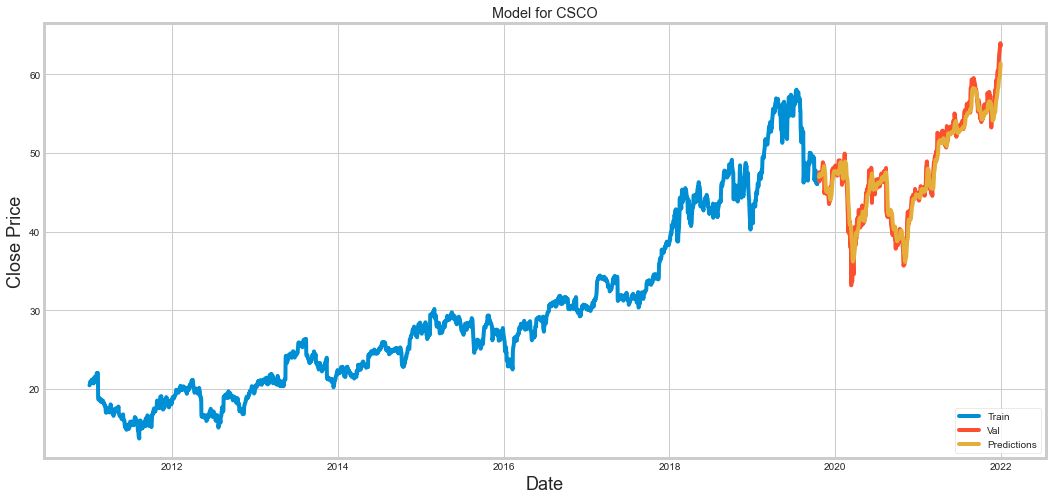

In [85]:
#Plot/Create the data for the graph
train_CSCO = data_CSCO[:training_data_len_CSCO]
valid_CSCO = data_CSCO[training_data_len_CSCO:]
valid_CSCO['Predictions'] = predictions_CSCO
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model for CSCO')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_CSCO['Close'])
plt.plot(valid_CSCO[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [86]:
print(valid_CSCO)

                Close  Predictions
Date                              
2019-10-22  47.549999    46.955612
2019-10-23  47.049999    47.158527
2019-10-24  46.410000    47.311386
2019-10-25  46.900002    47.315983
2019-10-28  47.169998    47.220428
...               ...          ...
2021-12-23  62.279999    59.449116
2021-12-27  63.419998    59.810162
2021-12-28  63.529999    60.296906
2021-12-29  63.959999    60.838810
2021-12-30  63.619999    61.358540

[553 rows x 2 columns]


## Model for Dominos

In [87]:
df_DPZ = web.DataReader('DPZ', data_source='yahoo', start=start, end=end)
# printing the data
df_DPZ

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,16.430000,15.880000,16.100000,16.290001,1220000.0,13.614460
2011-01-04,16.450001,15.900000,16.350000,16.170000,1156400.0,13.514172
2011-01-05,17.049999,16.190001,16.230000,16.680000,2015700.0,13.940408
2011-01-06,16.740000,16.370001,16.639999,16.600000,630500.0,13.873548
2011-01-07,16.750000,16.139999,16.510000,16.629999,589300.0,13.898616
...,...,...,...,...,...,...
2021-12-23,549.140015,534.150024,534.150024,545.840027,337500.0,541.009277
2021-12-27,561.919983,546.539978,547.299988,557.210022,477600.0,552.278625
2021-12-28,558.710022,551.979980,555.059998,557.770020,189800.0,552.833618


In [88]:
#Creating a new dataframe with only the 'Close' column
data_DPZ = df_DPZ.filter(['Close'])
#Converting the dataframe to a numpy array
dataset_DPZ = data_DPZ.values
#Get /Compute the number of rows to train the model on
training_data_len_DPZ = math.ceil( len(dataset_DPZ) *.8)
training_data_len_DPZ

2215

In [89]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data_DPZ = scaler.fit_transform(dataset_DPZ)
scaled_data_DPZ

array([[2.19689204e-04],
       [0.00000000e+00],
       [9.33673006e-04],
       ...,
       [9.91523709e-01],
       [1.00000000e+00],
       [9.90864561e-01]])

In [90]:
#Creating the scaled training data set
train_data_DPZ = scaled_data_DPZ[0:training_data_len_DPZ  , : ]
#Spliting the data into x_train and y_train data sets
x_train_DPZ=[]
y_train_DPZ =[]
for i in range(60,len(train_data_DPZ)):
    x_train_DPZ.append(train_data_DPZ[i-60:i,0])
    y_train_DPZ.append(train_data_DPZ[i,0])

In [91]:
#Here we are Converting x_train and y_train to numpy arrays
x_train_DPZ, y_train_DPZ = np.array(x_train_DPZ), np.array(y_train_DPZ)

In [92]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train_DPZ = np.reshape(x_train_DPZ, (x_train_DPZ.shape[0],x_train_DPZ.shape[1],1))

In [93]:
model = generate_model(x_train_DPZ)

#Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')

#fitting the network
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)               

In [94]:
csv_logger_DPZ = keras.callbacks.CSVLogger(f'{path_logs}/keras_log_DPZ.csv' ,append=True)
model.fit(x_train_DPZ,y_train_DPZ,batch_size=30,epochs=50, callbacks = [csv_logger_DPZ])
model.save("Trained_Model/DPZ_predict_model.h5")

Epoch 1/50
72/72 [==============================] - 19s 97ms/step - loss: 0.0147
Epoch 2/50
72/72 [==============================] - 7s 103ms/step - loss: 8.9361e-04
Epoch 3/50
72/72 [==============================] - 9s 118ms/step - loss: 7.8776e-04
Epoch 4/50
72/72 [==============================] - 10s 134ms/step - loss: 8.3517e-04
Epoch 5/50
72/72 [==============================] - 7s 100ms/step - loss: 7.9179e-04
Epoch 6/50
72/72 [==============================] - 7s 93ms/step - loss: 7.5881e-04
Epoch 7/50
72/72 [==============================] - 8s 108ms/step - loss: 6.2515e-04
Epoch 8/50
72/72 [==============================] - 11s 148ms/step - loss: 7.6710e-04
Epoch 9/50
72/72 [==============================] - 10s 137ms/step - loss: 6.3746e-04
Epoch 10/50
72/72 [==============================] - 9s 128ms/step - loss: 7.3196e-04
Epoch 11/50
72/72 [==============================] - 11s 151ms/step - loss: 6.3295e-04
Epoch 12/50
72/72 [==============================] - 8s 105ms/st

In [95]:
# here we are testing data set
test_data_DPZ = scaled_data_DPZ[training_data_len_DPZ - 60: , : ]
#Creating the x_test and y_test data sets
x_test_DPZ = []
y_test_DPZ =  dataset_DPZ[training_data_len_DPZ : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data_DPZ)):
    x_test_DPZ.append(test_data_DPZ[i-60:i,0])

In [96]:
# here we are converting x_test to a numpy array  
x_test_DPZ = np.array(x_test_DPZ)

In [97]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test_DPZ = np.reshape(x_test_DPZ, (x_test_DPZ.shape[0],x_test_DPZ.shape[1],1))

In [98]:
# now we are getting the models predicted price values
predictions_DPZ = model.predict(x_test_DPZ) 
predictions_DPZ = scaler.inverse_transform(predictions_DPZ)#Undo scaling

In [99]:
# here we are calculaing the value of RMSE 
rmse_DPZ=np.sqrt(np.mean(((predictions_DPZ- y_test_DPZ)**2)))
# printing rmse value for predictions and test set
rmse_DPZ

18.29101474028359

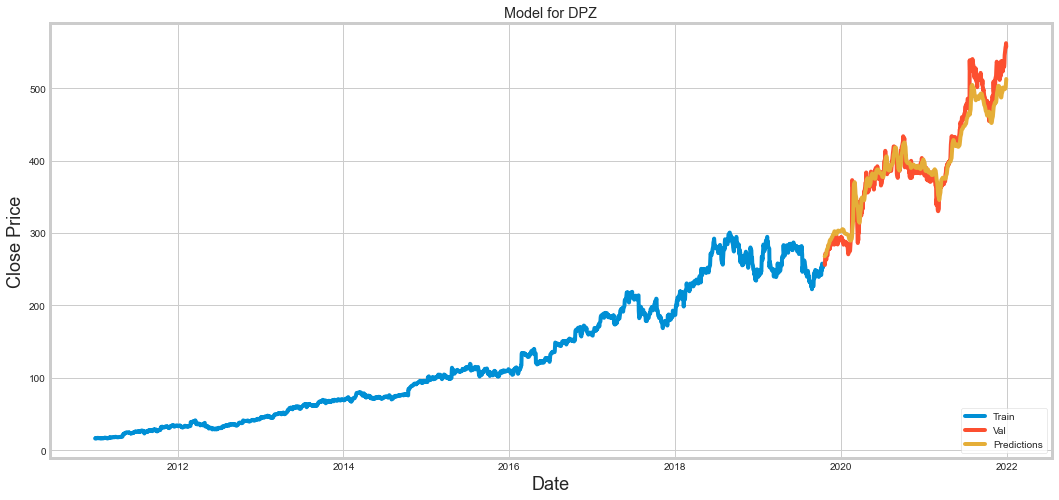

In [100]:
#Plot/Create the data for the graph
train_DPZ = data_DPZ[:training_data_len_DPZ]
valid_DPZ = data_DPZ[training_data_len_DPZ:]
valid_DPZ['Predictions'] = predictions_DPZ
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model for DPZ')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train_DPZ['Close'])
plt.plot(valid_DPZ[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [101]:
print(valid_DPZ)

                 Close  Predictions
Date                               
2019-10-22  258.940002   267.977966
2019-10-23  256.000000   268.529419
2019-10-24  263.600006   268.895142
2019-10-25  271.750000   269.372375
2019-10-28  269.459991   270.454529
...                ...          ...
2021-12-23  545.840027   498.849609
2021-12-27  557.210022   500.116821
2021-12-28  557.770020   503.236115
2021-12-29  562.400024   507.734283
2021-12-30  557.409973   512.890320

[553 rows x 2 columns]


### Conclusion: From the above predictions and root mean squared values (RSME), the model performance is better for AAPL, GOOG, CSCO, but performance with DPZ ticker is less due to the more divergence in the data.

### End of the Project